In [135]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from manual_image_segmentation_info import *

In [136]:
def plot_images(image_list, title_list=[], grid='off'):
    fig, axes = plt.subplots(nrows=1, ncols=len(image_list), figsize=(10*len(image_list), 10*1))
    if len(image_list) == 1:
        axes = [axes]

    for i, ax in enumerate(axes):
        ax.imshow(cv2.cvtColor(image_list[i], cv2.COLOR_BGR2RGB))
        if len(title_list) > 0:
            ax.set_title(title_list[i])
        ax.axis(grid)

In [144]:
def get_mission_image(mission_number):
    region_names = REGION_NAMES

    mission_image = cv2.imread('mission_'+str(mission_number)+'\\mission_'+str(mission_number)+'_bordered.png')
    h, w, c = mission_image.shape
    mission_image = mission_image[BORDER_H:h-2*BORDER_H, BORDER_W:w-2*BORDER_W, :]
    mission_image = cv2.resize(mission_image, (0,0), fx=0.1, fy=0.1)
    mission_image = mission_image[CROP:h-CROP, CROP:w-CROP, :]
        
    print('mission_image.shape:', mission_image.shape)

    return mission_image

In [145]:
def get_regions_mask(mission_number):
    regions_mask = dict()
    for name in region_names:
        region_mask = np.load('mission_'+str(mission_number)+'\\mission_'+str(mission_number)+'_region_'+name+'.npy').astype(np.uint8)*255

        region_mask = region_mask[BORDER_H:h-2*BORDER_H, BORDER_W:w-2*BORDER_W]
        region_mask = cv2.resize(region_mask, (0,0), fx=0.1, fy=0.1)
        region_mask = region_mask[CROP:h-CROP, CROP:w-CROP]

        print(name, ':', region_mask.shape)
        
        regions_mask[name] = region_mask
        
    return regions_mask

In [146]:
def get_regions_image(mission_image, regions_mask):
    regions_image = dict()
    for name in region_names:
        region_image = cv2.bitwise_and(mission_image, mission_image, mask=regions_mask[name])
        regions_image[name] = region_image.astype(np.uint8)

    return regions_image

# Start

In [147]:
mission_number = 2

mission_image = get_mission_image(mission_number)
regions_mask = get_regions_mask(mission_number)

mission_image.shape: (512, 568, 3)
GRASS : (512, 568)
SIDEWALK : (512, 568)
BUILDING : (512, 568)
GRAVEL : (512, 568)


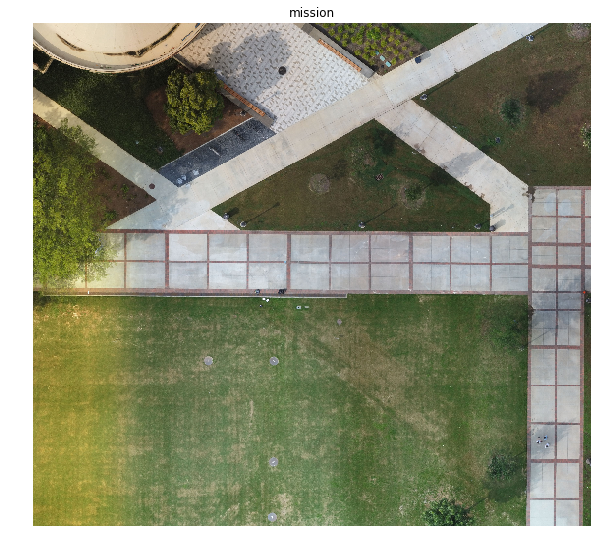

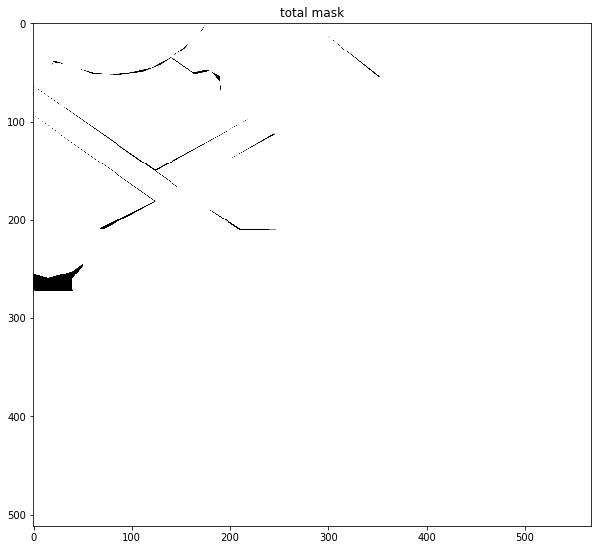

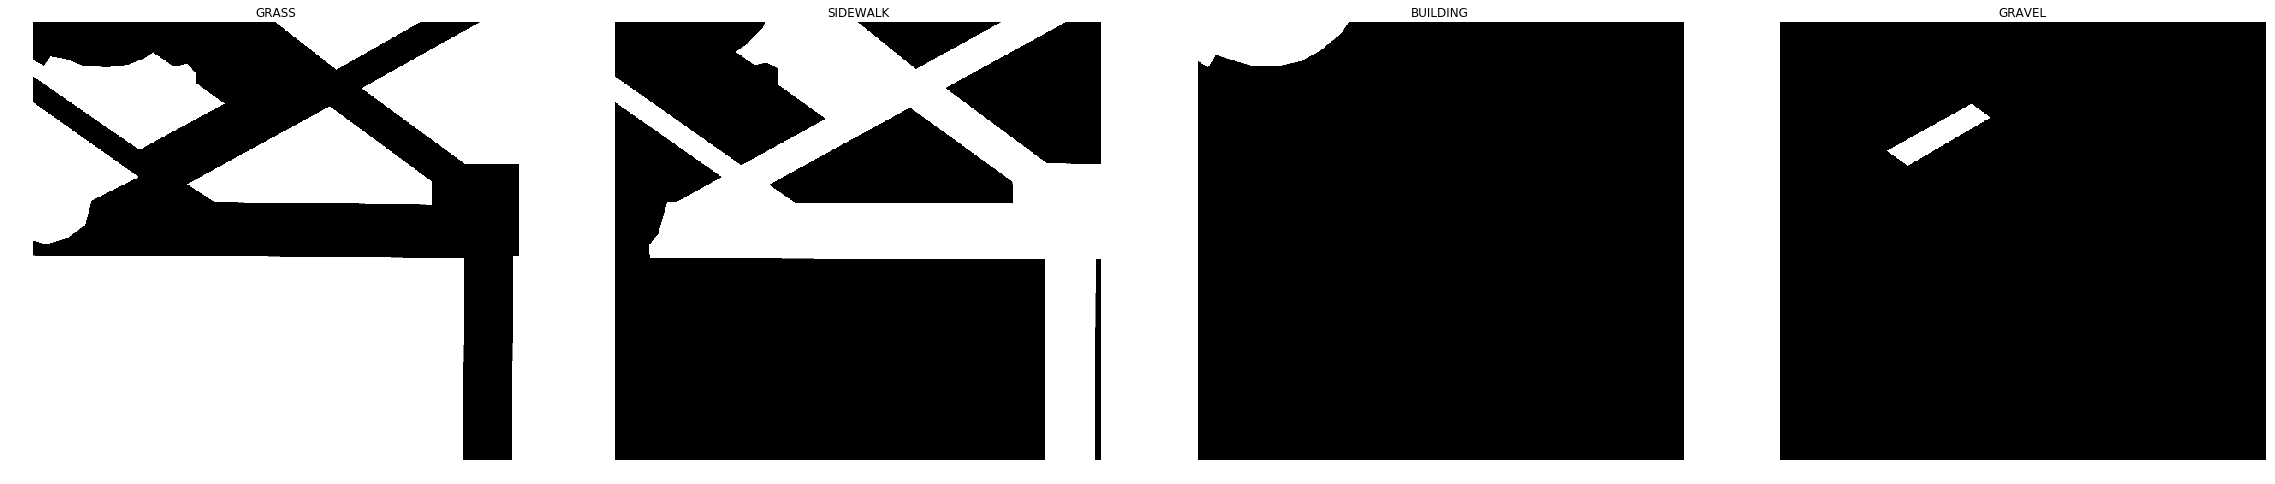

In [148]:
plot_images([mission_image], ['mission'])
plot_images([cv2.bitwise_or(cv2.bitwise_or(regions_mask[region_names[0]], regions_mask[region_names[1]]), cv2.bitwise_or(regions_mask[region_names[2]], regions_mask[region_names[3]]))], ['total mask'], grid='on')
plot_images(list(regions_mask.values()), region_names)

In [149]:
regions_image = get_regions_image(mission_image, regions_mask)

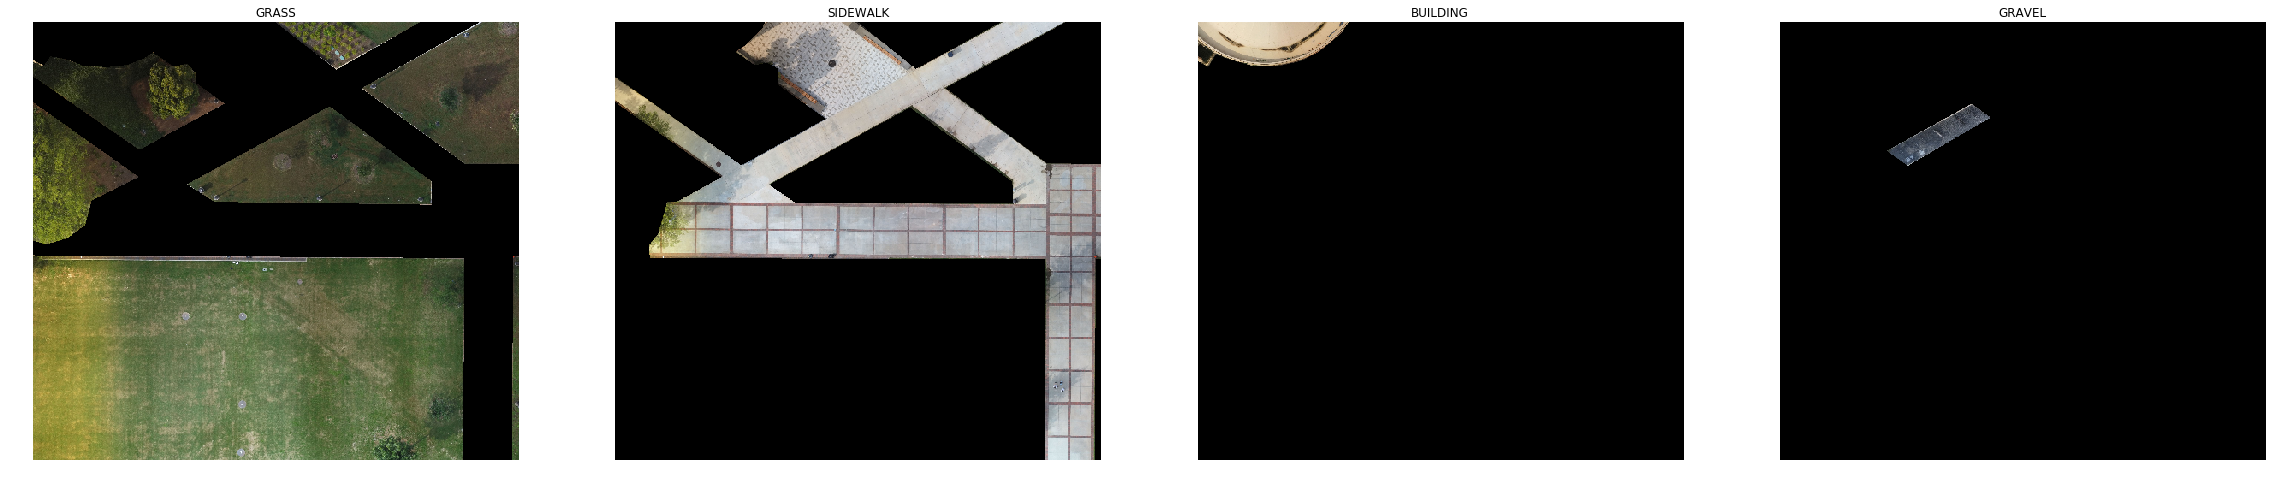

In [150]:
plot_images(list(regions_image.values()), region_names)